In [49]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import *

In [50]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [51]:
features =  ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
X = iris_df[features].values
Y = iris_df['target'].values

In [52]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def normalize(X):
        print("Mean and Standard Deviation Before")
        print(X.mean(axis=0), X.std(axis=0))

        #**********************************************
        ##### Standardize X part [feature wise scaling!!!!!]
        ##### and ensure that resultant data has mean around 0 and standard deviation 1 !!!
        sc=StandardScaler()
        XScaled = sc.fit_transform(X)
        #**********************************************

        print("Mean and Standard Deviation After")
        print(XScaled.mean(axis=0).round(4), XScaled.std(axis=0))
        return XScaled

XScaled = normalize(X)

Mean and Standard Deviation Before
[5.84333333 3.05733333 3.758      1.19933333] [0.82530129 0.43441097 1.75940407 0.75969263]
Mean and Standard Deviation After
[-0. -0. -0. -0.] [1. 1. 1. 1.]


In [53]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [54]:
acc=[]
summ=0;
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=2)
for train_index,test_index in skf.split(X,Y):
    X_train=X[train_index]
    X_test=X[test_index]
    Y_train=Y[train_index]
    Y_test=Y[test_index]
    LR_model=LogisticRegression()
    LR_model.fit(X_train,Y_train)
    y_pred_test=LR_model.predict(X_test)
    test_accuracy=metrics.accuracy_score(Y_test,y_pred_test)
    print("test-accuracy",test_accuracy)
    summ+=test_accuracy;
#     acc.append(test_accuracy)


test-accuracy 0.9333333333333333
test-accuracy 0.9666666666666667
test-accuracy 1.0
test-accuracy 0.9666666666666667
test-accuracy 0.9666666666666667


/home/dsc2/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/dsc2/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

In [55]:
summ/5

0.9666666666666666

# decision tree

In [65]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_confusion_matrix


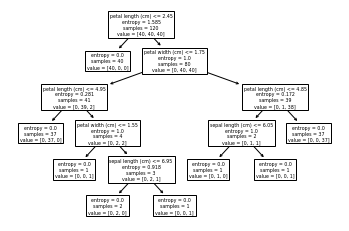

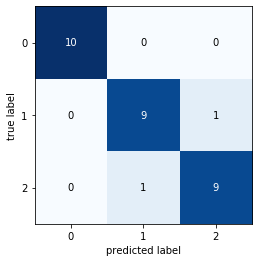

test-accuracy 0.9333333333333333


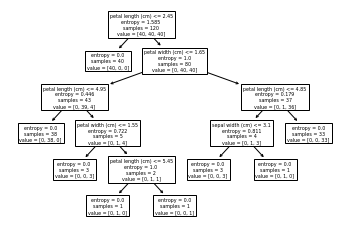

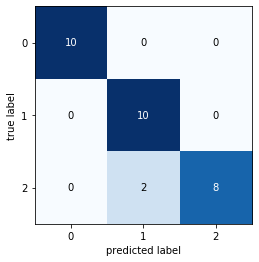

test-accuracy 0.9666666666666667


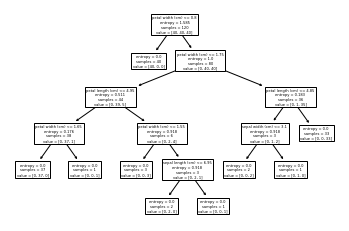

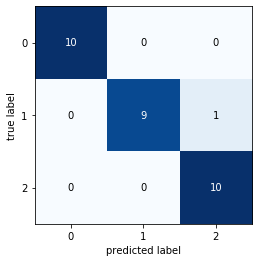

test-accuracy 1.0


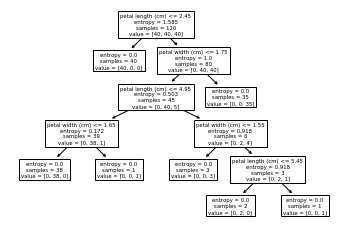

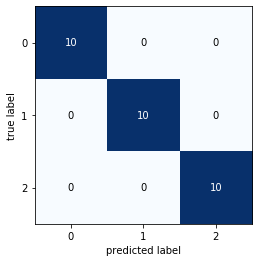

test-accuracy 0.9666666666666667


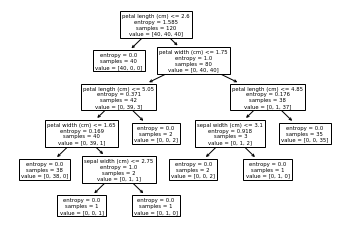

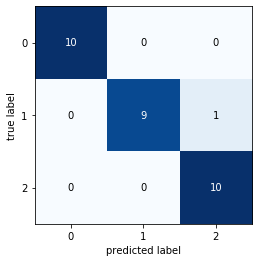

test-accuracy 0.9333333333333333


0.96

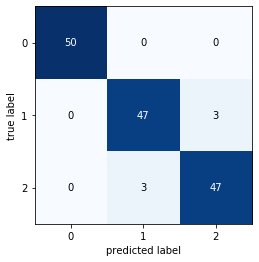

In [69]:
acc=[]
cm=[]
summ=0;
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=2)
for train_index,test_index in skf.split(X,Y):
    X_train=X[train_index]
    X_test=X[test_index]
    Y_train=Y[train_index]
    Y_test=Y[test_index]
    dtree = DecisionTreeClassifier(criterion='entropy')
    dtree = dtree.fit(X_train,Y_train)
    
    tree.plot_tree(dtree, feature_names=features)
#     plt.show()
    
    confusion_matrix = metrics.confusion_matrix(Y_test, y_pred_test)
    cm.append(confusion_matrix)
    plot_confusion_matrix(confusion_matrix )
    plt.show()
    
    
    y_pred_test=dtree.predict(X_test)
    test_accuracy=metrics.accuracy_score(Y_test,y_pred_test)
    print("test-accuracy",test_accuracy)
    summ+=test_accuracy;
    
    
c_m=np.array(cm)
c_m=np.sum(c_m,axis=0)
plot_confusion_matrix(c_m)


#     acc.append(test_accuracy)
summ/5

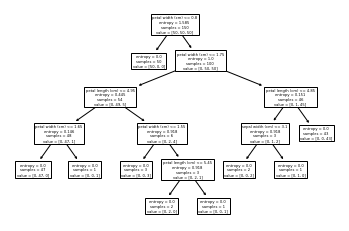

In [58]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree = dtree.fit(X, Y)

tree.plot_tree(dtree, feature_names=features)
plt.show()

LOGISTIC REGRESSION WITH REGULARISATION

In [61]:
for C in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    acc=[]
    summ=0;
    skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=2)
    for train_index,test_index in skf.split(X,Y):
        X_train=X[train_index]
        X_test=X[test_index]
        Y_train=Y[train_index]
        Y_test=Y[test_index]
        LR_model=LogisticRegression(C=C,max_iter=3000)
        LR_model.fit(X_train,Y_train)
        y_pred_test=LR_model.predict(X_test)
        test_accuracy=metrics.accuracy_score(Y_test,y_pred_test)
        summ+=test_accuracy;
    print("test-accuracy c-",C,(summ/5)*100)
        

test-accuracy c- 0.1 96.0
test-accuracy c- 0.2 96.0
test-accuracy c- 0.3 96.66666666666669
test-accuracy c- 0.4 96.66666666666669
test-accuracy c- 0.5 96.66666666666669
test-accuracy c- 0.6 96.66666666666669
test-accuracy c- 0.7 97.33333333333334
test-accuracy c- 0.8 97.33333333333334
test-accuracy c- 0.9 97.33333333333334
test-accuracy c- 1 96.66666666666666
